Check the output of the data
- data structure
- if the halos are well matched
- if the halos matches the true halo lightcone data

**1. data structure**

In [2]:
import h5py

def h5ls(f):
    if type(f) == h5py._hl.dataset.Dataset:
        print(f, f[:10])
    else:
        print(f.keys())
        for key in f.keys():
            h5ls(f[key])

with h5py.File('../data/halo_crossing.hdf5', 'r') as f:
    h5ls(f)

<KeysViewHDF5 ['lightcone0000']>
<KeysViewHDF5 ['lightlike', 'spacelike']>
<KeysViewHDF5 ['Snapshot0071', 'Snapshot0072', 'Snapshot0073', 'Snapshot0074', 'Snapshot0075', 'Snapshot0076']>
<KeysViewHDF5 ['GalaxyID', 'GasMass', 'LX0InRestframeWithoutRecentAGNHeating', 'LX0InRestframeWithoutRecentAGNHeatingCoreExcision', 'LX0WithoutRecentAGNHeating', 'LX0WithoutRecentAGNHeatingCoreExcision', 'M500', 'Mass_tot', 'MfofSOAP', 'SOAPID', 'SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision', 'TopLeafID', 'Vx', 'Vy', 'Vz', 'Xcminpot', 'Y5R500WithoutRecentAGNHeating', 'Ycminpot', 'Zcminpot', 'redshift']>
<HDF5 dataset "GalaxyID": shape (0,), type "<i8"> []
<HDF5 dataset "GasMass": shape (0,), type "<f4"> []
<HDF5 dataset "LX0InRestframeWithoutRecentAGNHeating": shape (0,), type "<f8"> []
<HDF5 dataset "LX0InRestframeWithoutRecentAGNHeatingCoreExcision": shape (0,), type "<f8"> []
<HDF5 dataset "LX0WithoutRecentAGNHeating": shape (0,), type "<f8"> []
<HDF5 dataset "LX0WithoutRecentAGNH

**2. halo matching**
- compare ID
- compare mass and coordinates

for all tests make sure do all snapshots

*SOAP quantities* LX, YSZ, Mgas, T

Median: -0.018336546187508837 Mean -0.026541459084777865


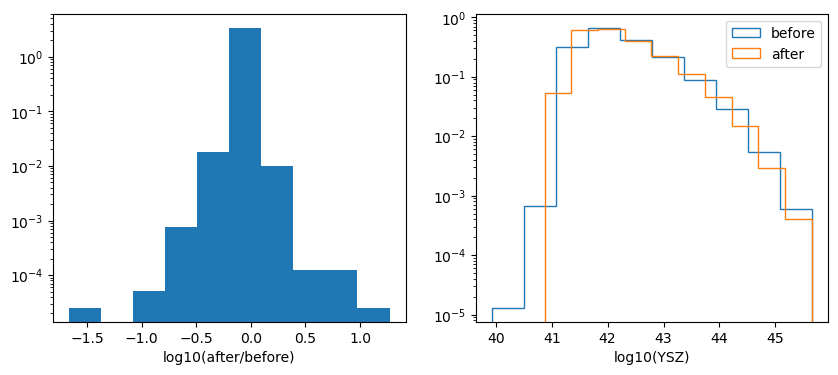

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def check_scalar(qtydictname, qtyplotname, filename='../data/halo_crossing.hdf5'):
    qty0 = np.array([])
    qty1 = np.array([])

    with h5py.File(filename, 'r') as f:
        for snapnum in [77, 76, 75, 74, 73, 72]:
            massfof0 = f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/{qtydictname}'][:]
            massfof1 = f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/{qtydictname}'][:]
            qty0 = np.concatenate((qty0, massfof0))
            qty1 = np.concatenate((qty1, massfof1))
    # remove zero
    mask = (qty0 > 0) & (qty1 > 0)
    qty0 = qty0[mask]
    qty1 = qty1[mask]

    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    qty_diff = qty1 - qty0
    print('Median:', np.median(qty_diff/qty0), 'Mean', np.mean(qty_diff/qty0))
    ax[0].hist(np.log10(qty1/qty0), log=True, density=True)
    ax[0].set_xlabel(f'log10(after/before)')

    # separate plot
    ax[1].hist(np.log10(qty0), log=True, histtype='step', density=True, label='before')
    ax[1].hist(np.log10(qty1), log=True, histtype='step', density=True, label='after')
    ax[1].set_xlabel(f'log10({qtyplotname})')
    plt.legend()

    return fig, ax

import sys
sys.path.append('../tools')
import clusterfit as cf

check_scalar(qtydictname=cf.COLUMNS['YSZ'], qtyplotname='YSZ')

plt.show()

*coordinates X, Y, Z*

0.32046344713494634 0.9637371190413269


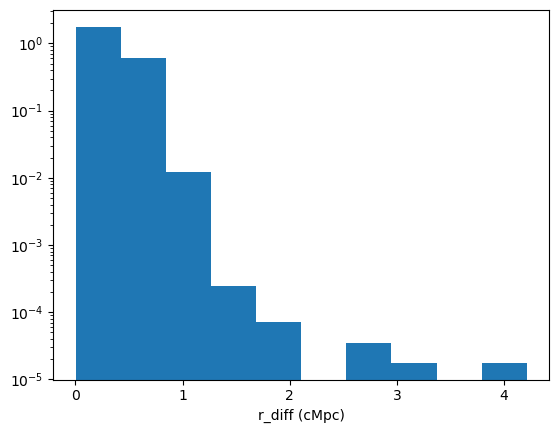

In [45]:
import numpy as np
x0 = np.array([])
y0 = np.array([])
z0 = np.array([])
x1 = np.array([])
y1 = np.array([])
z1 = np.array([])

with h5py.File('../data/halo_crossing.hdf5', 'r') as f:
    for snapnum in [77, 76, 75, 74, 73, 72]:        
        x0 = np.concatenate((x0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Xcminpot'][:]))
        y0 = np.concatenate((y0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Ycminpot'][:]))
        z0 = np.concatenate((z0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Zcminpot'][:]))
        x1 = np.concatenate((x1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Xcminpot'][:]))
        y1 = np.concatenate((y1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Ycminpot'][:]))
        z1 = np.concatenate((z1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Zcminpot'][:]))


import matplotlib.pyplot as plt
r_diff = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
print(np.median(r_diff), np.mean(r_diff))
plt.hist(r_diff[r_diff < 500], log=True, density=True)
plt.xlabel('r_diff (cMpc)')
plt.show()

*velocity vx, vy, vz*

19.844164026463403 29.653050610981854


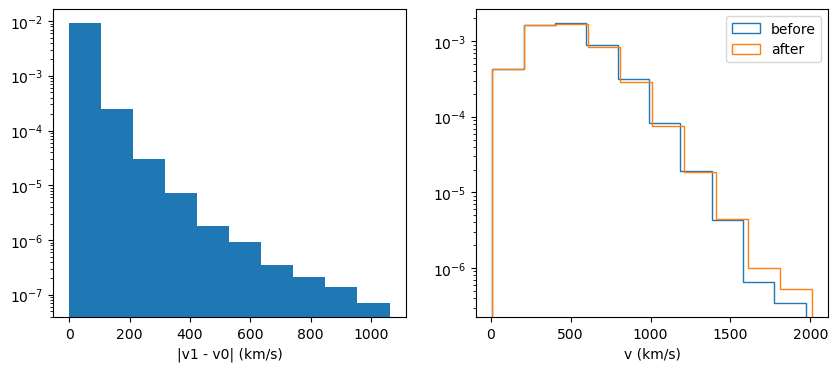

In [6]:
import numpy as np
x0 = np.array([])
y0 = np.array([])
z0 = np.array([])
x1 = np.array([])
y1 = np.array([])
z1 = np.array([])

with h5py.File('../data/halo_crossing.hdf5', 'r') as f:
    for snapnum in [77, 76, 75, 74, 73, 72]:        
        x0 = np.concatenate((x0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Vx'][:]))
        y0 = np.concatenate((y0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Vy'][:]))
        z0 = np.concatenate((z0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Vz'][:]))
        x1 = np.concatenate((x1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Vx'][:]))
        y1 = np.concatenate((y1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Vy'][:]))
        z1 = np.concatenate((z1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Vz'][:]))


import matplotlib.pyplot as plt
v1 = np.sqrt(x0**2 + y0**2 + z0**2)
v0 = np.sqrt(x1**2 + y1**2 + z1**2)
v_diff = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
print(np.median(v_diff), np.mean(v_diff))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(v_diff, log=True, density=True)
ax[0].set_xlabel('|v1 - v0| (km/s)')

ax[1].hist(v0, log=True, density=True, label='before', histtype='step')
ax[1].hist(v1, log=True, density=True, label='after', histtype='step')
ax[1].set_xlabel('v (km/s)')
plt.legend()

plt.show()

**3. matching with true lightcone halo data**
- compare ID and snapnum

In [60]:
with h5py.File(f'/cosma8/data/dp004/jch/FLAMINGO/lightcone_halos/HYDRO_FIDUCIAL/lightcone_halos/lightcone0/lightcone_halos_0000.hdf5', 'r') as f:
    print(f['Subhalo'].keys())
    print(f['Subhalo/Mass_tot'][:])
    print(f['Subhalo/Mass_tot'].attrs.keys())
    print(f['Subhalo/Mass_tot'].attrs['Conversion factor to CGS (including cosmological corrections)'])
    print(f['Subhalo/Mass_tot'].attrs['Conversion factor to CGS (not including cosmological corrections)'])
    print(f['Subhalo/LightconeXcminpot'].attrs['a-scale exponent'])
    print(f['Subhalo/Xcminpot'].attrs['a-scale exponent'])
# >>> 1.98841e+43 # = 1e10 Msun

<KeysViewHDF5 ['ID', 'ID_mbp_bh', 'ID_tracer_bh', 'LightconeRedshift', 'LightconeXcminpot', 'LightconeXtracer_bh', 'LightconeYcminpot', 'LightconeYtracer_bh', 'LightconeZcminpot', 'LightconeZtracer_bh', 'Mass_bh', 'Mass_gas', 'Mass_star', 'Mass_tot', 'Redshift', 'SnapNum', 'Structuretype', 'Xcmbp_bh', 'Xcminpot', 'Xtracer_bh', 'Ycmbp_bh', 'Ycminpot', 'Ytracer_bh', 'Zcmbp_bh', 'Zcminpot', 'Ztracer_bh', 'n_bh']>
[ 48.72765   28.745783 362.89514  ...  47.743458  85.367676  38.090775]
<KeysViewHDF5 ['Conversion factor to CGS (including cosmological corrections)', 'Conversion factor to CGS (not including cosmological corrections)', 'U_I exponent', 'U_L exponent', 'U_M exponent', 'U_T exponent', 'U_t exponent', 'a-scale exponent', 'h-scale exponent']>
[1.98841e+43]
[1.98841e+43]
[0.]
[1.]


In [58]:
import h5py
for snapnum in [77, 76, 75, 74, 73]:
    lcnum = 77 - snapnum
    print(f'Snapshot{snapnum:04d}')
    with h5py.File(f'/cosma8/data/dp004/jch/FLAMINGO/lightcone_halos/HYDRO_FIDUCIAL/lightcone_halos/lightcone0/lightcone_halos_{lcnum:04d}.hdf5', 'r') as f:
        vrid = f['Subhalo/ID'][:]
        # print(f['Subhalo'].keys())
        mask = (f['Subhalo/Mass_tot'][:] > 1e3) & (f['Subhalo/Structuretype'][:] == 10)
        vrid = vrid[mask]
    print(len(vrid))

    with h5py.File('../data/halo_crossing.hdf5', 'r') as f:
        soapid0 = f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/SOAPID'][:]
        # soapid1 = f[f'lightcone0000/lightlike/Snapshot{snapnum:04d}/SOAPID'][:]
    print(len(soapid0))

    import numpy as np
    overlap0 = np.isin(soapid0+1, vrid)
    print(f'overlap with the spacelike snapshot: {np.sum(overlap0)}')
    print(f'ratio overlap to halo lightcone: {np.sum(overlap0)/len(vrid):.2%}') 
    print(f'ratio overlap to mock lightcone: {np.sum(overlap0)/len(soapid0):.2%}')

    # overlap1 = np.isin(soapid1+1, vrid)
    # print(f'overlap with the lightlike snapshot: {np.sum(overlap1)}')
    # print(f'percentage of halo found: {np.sum(overlap1)/len(vrid):.2%}') 

    # print(f'percentage of halo lightcone replicated: {(np.sum(overlap1)+np.sum(overlap0))/len(vrid):.2%} ')

Snapshot0077
898
6074
overlap with the spacelike snapshot: 773
ratio overlap to halo lightcone: 86.08%
ratio overlap to mock lightcone: 12.73% 
Snapshot0076
21509
39299
overlap with the spacelike snapshot: 13580
ratio overlap to halo lightcone: 63.14%
ratio overlap to mock lightcone: 34.56% 
Snapshot0075
74685
72281
overlap with the spacelike snapshot: 38694
ratio overlap to halo lightcone: 51.81%
ratio overlap to mock lightcone: 53.53% 
Snapshot0074
157042
16617
overlap with the spacelike snapshot: 14263
ratio overlap to halo lightcone: 9.08%
ratio overlap to mock lightcone: 85.83% 
Snapshot0073
256683
15
overlap with the spacelike snapshot: 15
ratio overlap to halo lightcone: 0.01%
ratio overlap to mock lightcone: 100.00% 
